# Algorithmic Trading Model for Technical Analysis Indicators Using Python
### David Lowe
### May 5, 2020

SUMMARY: The purpose of this project is to construct and test an algorithmic trading model and document the end-to-end steps using a template.

Additional Notes: This is a replication of various technical analysis indicators from Chapter 2 of Learn Algorithmic Trading by Sebastien Donadio and Sourav Ghosh with Packt Publishing (https://www.packtpub.com/data/learn-algorithmic-trading-fundamentals-of-algorithmic-trading). I plan to leverage the sample code segments and incorporate them into the trading model template that I am building.

Dataset ML Model: Time series analysis with numerical attributes

Dataset Used: Various sources as illustrated below.

Dataset Reference: Various sources as documented below.

## Task 1. Prepare Environment

In [1]:
# Install the necessary Python module(s) in Colab
# !pip install yfinance edgar

In [2]:
# import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from datetime import datetime

c:\users\david\pycharmprojects\mypythonproject\venv\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Configure the plotting style
plt.style.use('seaborn')

In [4]:
start_date = datetime(2017, 1, 1)
print("Starting date:", start_date)
# end_date = datetime.now()
end_date = datetime(2019, 12, 31)
print("Ending date:", end_date)

stock_symbol = 'GOOG'

Starting date: 2017-01-01 00:00:00
Ending date: 2019-12-31 00:00:00


## Task 2. Acquire and Pre-Process Data

### 2.a) Yahoo Finance

In [5]:
import yfinance as yf
yf.pdr_override()
stock_yahoo = pdr.get_data_yahoo(stock_symbol, start_date, end_date)
print(len(stock_yahoo), 'data points retrieved from the API call.')

[*********************100%***********************]  1 of 1 completed
753 data points retrieved from the API call.


In [6]:
stock_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       753 non-null    float64
 1   High       753 non-null    float64
 2   Low        753 non-null    float64
 3   Close      753 non-null    float64
 4   Adj Close  753 non-null    float64
 5   Volume     753 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


In [7]:
stock_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600


In [8]:
stock_yahoo.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,1355.869995,1359.800049,1346.510010,1348.839966,1348.839966,883100
2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900


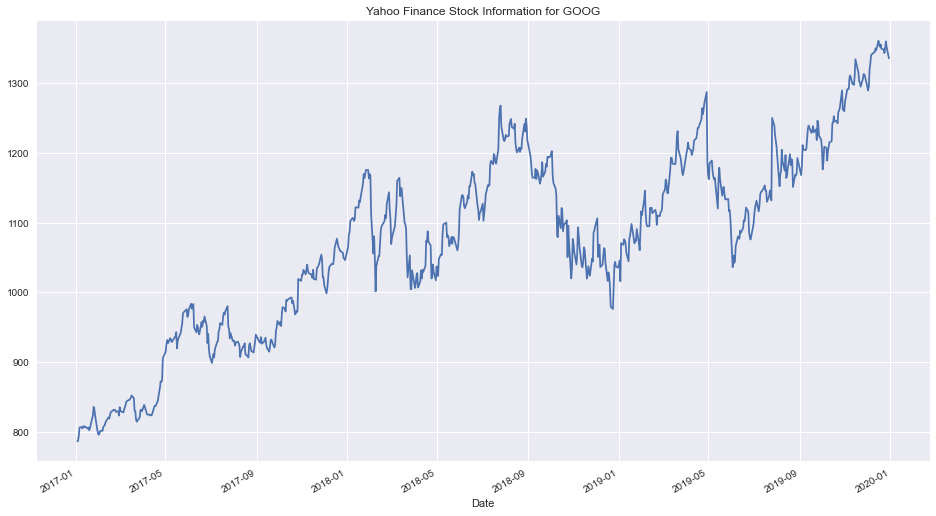

In [9]:
title_string = 'Yahoo Finance Stock Information for ' + stock_symbol
stock_yahoo['Adj Close'].plot(figsize=(16,9), title=title_string)
plt.show()

### 2.b) Alpha Vantage

In [10]:
# Check and see whether the API key is available
# alphavantage_key = os.environ.get('ALPHAVANTAGE_API')
# if (alphavantage_key==None): sys.exit("API key for Alpha Vantage not available. Script Processing Aborted!!!")
# alphavantage_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=%s&outputsize=full&apikey=%s" % (stock_symbol, alphavantage_key)

In [11]:
# response = requests.get(alphavantage_url)
# alpha_dict = json.loads(response.text)
# print(len(alpha_dict['Time Series (Daily)']), 'data points retrieved from the API call.')
# if (verbose): print(alpha_dict)

In [12]:
# stock_alpha = pd.DataFrame(alpha_dict['Time Series (Daily)']).T
# stock_alpha.index = pd.to_datetime(stock_alpha.index)
# stock_alpha = stock_alpha.sort_index(ascending = True)
# stock_alpha.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume', 'dividend', 'split_coef']
# stock_alpha = stock_alpha.astype(float)
# stock_alpha.info()

In [13]:
# stock_alpha.head()

In [14]:
# stock_alpha.tail()

In [15]:
# title_string = alpha_dict['Meta Data']['1. Information'] + ' for ' + alpha_dict['Meta Data']['2. Symbol']
# stock_alpha['close'].plot(figsize=(16,9), title=title_string)
# plt.show()

### 2.c) IEX Cloud

In [16]:
# Check and see whether the API key is available
# iexcloud_key = os.environ.get('IEXCLOUD_API')
# if (iexcloud_key==None): sys.exit("API key for IEX Cloud not available. Script Processing Aborted!!!")
# iexcloud_url = "https://cloud.iexapis.com/stable/stock/%s/chart/5y?token=%s" % (stock_symbol, iexcloud_key)

In [17]:
# response = requests.get(iexcloud_url)
# iex_dict = json.loads(response.text)
# print(len(iex_dict), 'data points retrieved from the API call.')
# if (verbose): print(iex_dict)

In [18]:
# stock_iexcloud = pd.DataFrame(iex_dict)
# stock_iexcloud.set_index('date', inplace=True)
# stock_iexcloud = stock_iexcloud.sort_index(ascending = True)
# stock_iexcloud.info()

In [19]:
# stock_iexcloud.head()

In [20]:
# stock_iexcloud.tail()

In [21]:
# title_string = 'IEX Cloud Historical Stock Information for ' + stock_symbol
# stock_iexcloud['close'].plot(figsize=(16,9), title=title_string)
# plt.show()

### 2.d) Quandl

In [22]:
# Code not activated below as Quandl requires a premium subscription for EOD stock data
# Code maintained here for future testing and uses

In [23]:
# Check and see whether the API key is available
# quandl_key = os.environ.get('QUANDL_API')
# if (quandl_key==None): sys.exit("API key for Quandl not available. Script Processing Aborted!!!")
# quandl_url = "https://www.quandl.com/api/v3/datasets/EOD/%s.json?api_key=%s" % (stock_symbol, quandl_key)

In [24]:
# response = requests.get(quandl_url)
# quandl_dict = json.loads(response.text)
# print(len(quandl_dict['dataset']['data']), 'data points retrieved from the API call.')
# if (verbose): print(quandl_dict)

In [25]:
# stock_quandl = pd.DataFrame(quandl_dict['dataset']['data'])
# stock_quandl.columns = quandl_dict['dataset']['column_names']
# stock_quandl.set_index('Date', inplace=True)
# stock_quandl = stock_quandl.sort_index(ascending = True)
# stock_quandl.info()

In [26]:
# stock_quandl.head()

In [27]:
# stock_quandl.tail()

In [28]:
# title_string = 'Quandl EOD Stock Information for ' + quandl_dict['dataset']['dataset_code']
# stock_quandl['Close'].plot(figsize=(16,9), title=title_string)
# plt.show()

### 2.e) Federal Reserve Economic Data (FRED)

In [29]:
# Code maintained here for future uses. Update the data series name below before use

In [30]:
# fred_data = 'DGS10'
# fred_series = pdr.DataReader(fred_data, 'fred', start_date, end_date)
# print(len(fred_series), 'data points retrieved from the API call.')

In [31]:
# fred_series.head()

In [32]:
# fred_series.tail()

In [33]:
# title_string = '10-Year Treasury Constant Maturity Rate'
# fred_series.plot(figsize=(16,9), title=title_string)
# plt.show()

### 2.f) Electronic Data Gathering, Analysis, and Retrieval system (EDGAR)

In [34]:
# Code maintained here for future uses. Update the company name and CKI number below before use

In [35]:
# import edgar
# edgar_filing = edgar.Company("MICROSOFT CORP", "0000789019")
# tree = edgar_filing.get_all_filings(filing_type = "10-K")
# docs = edgar_filing.get_documents(tree, no_of_documents=5)
# print(len(docs), "documents retrieved from EDGAR.")

## Task 3. Build Technical Analysis Indicators

### 3.a) Simple Moving Average (SMA)

In [36]:
model_sma = stock_yahoo.loc[:, ['Adj Close']]
model_sma.rename(columns={'Adj Close': 'Close'}, inplace=True)
model_sma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [37]:
sma1 = 20
sma2 = 50
model_sma['SMA_20'] = model_sma['Close'].rolling(window=sma1).mean()
model_sma['SMA_50'] = model_sma['Close'].rolling(window=sma2).mean()
model_sma.dropna(inplace=True)
model_sma.head()

,Close,SMA_20,SMA_50
Date,,,
2017-03-15,847.200012,832.819501,817.796201
2017-03-16,848.780029,834.309503,819.049001
2017-03-17,852.119995,835.707504,820.353401
2017-03-20,848.400024,836.724005,821.441001
2017-03-21,830.460022,836.664008,821.927201


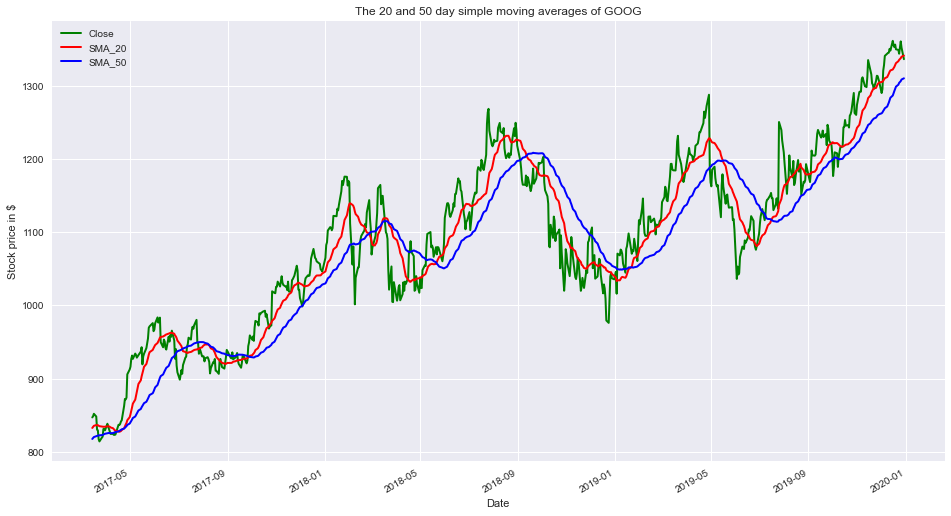

In [38]:
graph_title = 'The 20 and 50 day simple moving averages of ' + stock_symbol
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111, ylabel='Stock price in $', title=graph_title)
model_sma['Close'].plot(ax=ax1, color='g', lw=2.)
model_sma['SMA_20'].plot(ax=ax1, color='r', lw=2.)
model_sma['SMA_50'].plot(ax=ax1, color='b', lw=2.)
plt.legend()
plt.show()

### 3.b) Exponential Moving Average (EMA)

In [39]:
model_ema = stock_yahoo.loc[:, ['Adj Close']]
model_ema.rename(columns={'Adj Close': 'Close'}, inplace=True)
model_ema.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [40]:
ema1 = 20
ema2 = 50
model_ema['EMA_20'] = model_ema['Close'].ewm(span=ema1, min_periods=ema1).mean()
model_ema['EMA_50'] = model_ema['Close'].ewm(span=ema2, min_periods=ema2).mean()
model_ema.dropna(inplace=True)
model_ema.head()

,Close,EMA_20,EMA_50
Date,,,
2017-03-15,847.200012,833.180090,825.138675
2017-03-16,848.780029,834.674873,826.204313
2017-03-17,852.119995,836.345490,827.365661
2017-03-20,848.400024,837.499274,828.303019
2017-03-21,830.460022,836.825841,828.398630


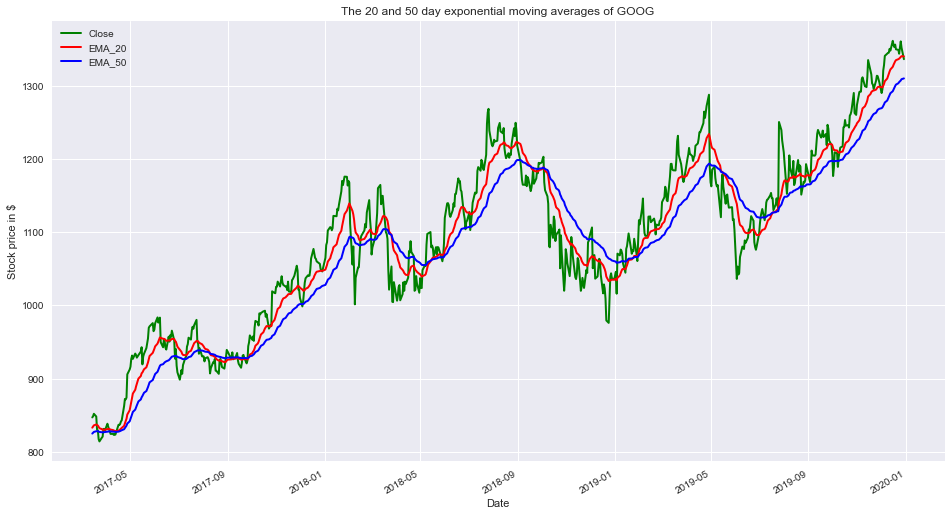

In [41]:
graph_title = 'The 20 and 50 day exponential moving averages of ' + stock_symbol
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111, ylabel='Stock price in $', title=graph_title)
model_ema['Close'].plot(ax=ax1, color='g', lw=2.)
model_ema['EMA_20'].plot(ax=ax1, color='r', lw=2.)
model_ema['EMA_50'].plot(ax=ax1, color='b', lw=2.)
plt.legend()
plt.show()

### 3.c) Absolute Price Oscillator (APO)

In [42]:
model_apo = stock_yahoo.loc[:, ['Adj Close']]
model_apo.rename(columns={'Adj Close': 'Close'}, inplace=True)
model_apo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [43]:
apo1 = 10
apo2 = 40
model_apo['EMA_Fast'] = model_apo['Close'].ewm(span=apo1, min_periods=apo1).mean()
model_apo['EMA_Slow'] = model_apo['Close'].ewm(span=apo2, min_periods=apo2).mean()
model_apo['APO'] = model_apo['EMA_Fast'] - model_apo['EMA_Slow']
model_apo.dropna(inplace=True)
model_apo.head()

,Close,EMA_Fast,EMA_Slow,APO
Date,,,,
2017-03-01,835.239990,826.923811,818.015607,8.908204
2017-03-02,830.630005,827.597845,818.721819,8.876026
2017-03-03,829.080017,827.867390,819.297571,8.569819
2017-03-06,827.780029,827.851503,819.765875,8.085628
2017-03-07,831.909973,828.589515,820.432050,8.157465


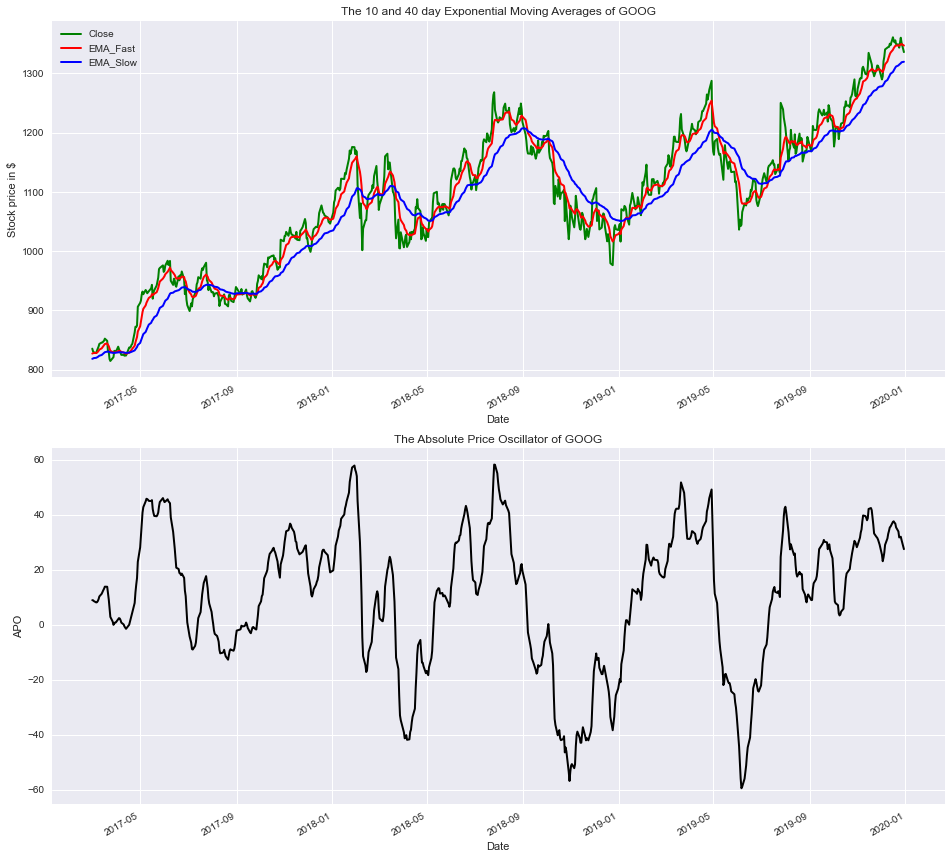

In [44]:
graph_title1 = 'The 10 and 40 day Exponential Moving Averages of ' + stock_symbol
graph_title2 = 'The Absolute Price Oscillator of ' + stock_symbol
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(211, ylabel='Stock price in $', title=graph_title1)
model_apo['Close'].plot(ax=ax1, color='g', lw=2., legend=True)
model_apo['EMA_Fast'].plot(ax=ax1, color='r', lw=2., legend=True)
model_apo['EMA_Slow'].plot(ax=ax1, color='b', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO', title=graph_title2)
model_apo['APO'].plot(ax=ax2, color='k', lw=2.)
plt.show()

### 3.d) Moving Average Convergence Divergence (MACD)

In [45]:
model_macd = stock_yahoo.loc[:, ['Adj Close']]
model_macd.rename(columns={'Adj Close': 'Close'}, inplace=True)
model_macd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [46]:
ema_fast = 10
ema_slow = 40
signal_len = 20
model_macd['EMA_Fast'] = model_macd['Close'].ewm(span=ema_fast, min_periods=ema_fast).mean()
model_macd['EMA_Slow'] = model_macd['Close'].ewm(span=ema_slow, min_periods=ema_slow).mean()
model_macd['MACD'] = model_macd['EMA_Fast'] - model_macd['EMA_Slow']
model_macd['MACD_Signal'] = model_macd['MACD'].ewm(span=signal_len, min_periods=signal_len).mean()
model_macd['MACD_Hist'] = model_macd['MACD'] - model_macd['MACD_Signal']
model_macd.dropna(inplace=True)
model_macd.head()

,Close,EMA_Fast,EMA_Slow,MACD,MACD_Signal,MACD_Hist
Date,,,,,,
2017-03-28,820.919983,827.859028,827.914609,-0.055582,7.664381,-7.719963
2017-03-29,831.409973,828.504658,828.094043,0.410615,6.877337,-6.466721
2017-03-30,831.500000,829.049268,828.268441,0.780827,6.224515,-5.443687
2017-03-31,829.559998,829.142129,828.334414,0.807715,5.651266,-4.843551
2017-04-03,838.549988,830.852654,828.855029,1.997624,5.268660,-3.271036


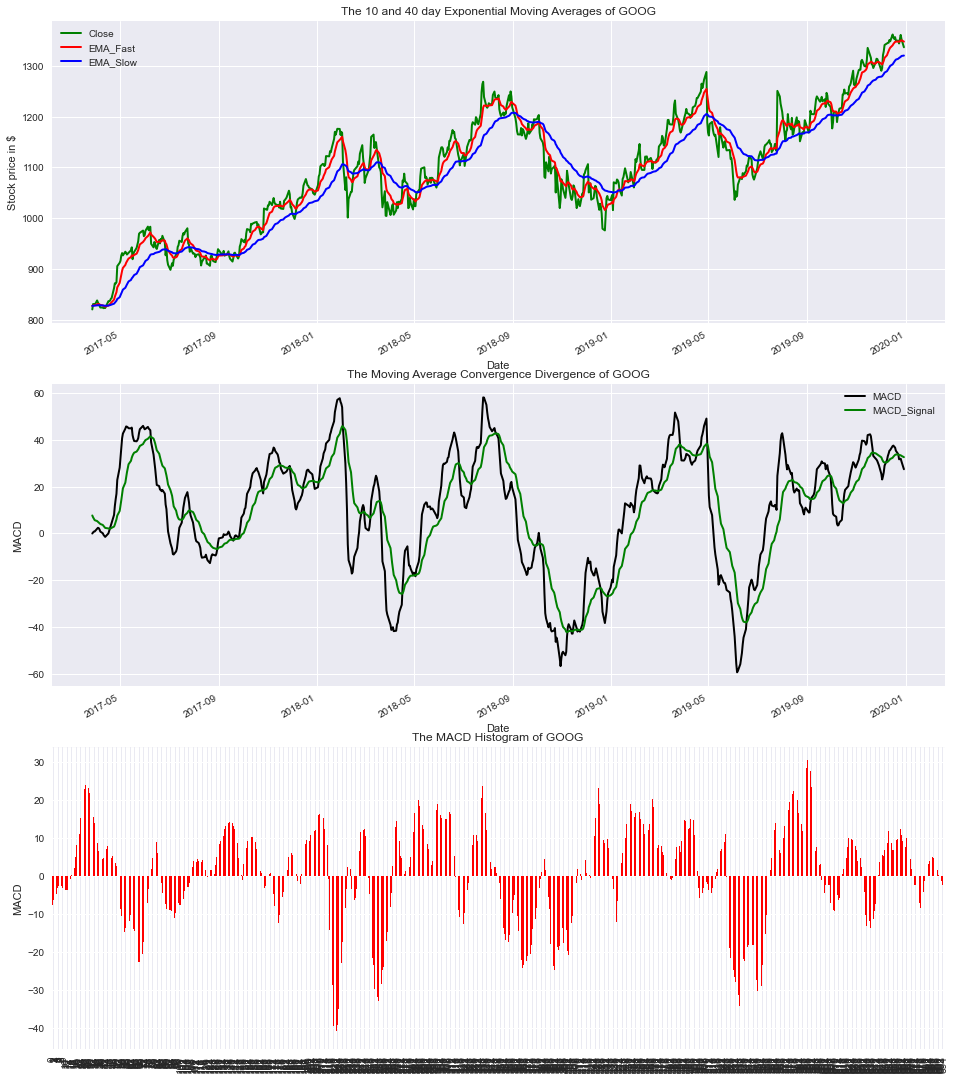

In [47]:
graph_title1 = 'The 10 and 40 day Exponential Moving Averages of ' + stock_symbol
graph_title2 = 'The Moving Average Convergence Divergence of ' + stock_symbol
graph_title3 = 'The MACD Histogram of ' + stock_symbol
fig = plt.figure(figsize=(16,21))
ax1 = fig.add_subplot(311, ylabel='Stock price in $', title=graph_title1)
model_macd['Close'].plot(ax=ax1, color='g', lw=2., legend=True)
model_macd['EMA_Fast'].plot(ax=ax1, color='r', lw=2., legend=True)
model_macd['EMA_Slow'].plot(ax=ax1, color='b', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='MACD', title=graph_title2)
model_macd['MACD'].plot(ax=ax2, color='k', lw=2., legend=True)
model_macd['MACD_Signal'].plot(ax=ax2, color='g', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD', title=graph_title3)
model_macd['MACD_Hist'].plot(ax=ax3, color='r', kind='bar', use_index=False)
plt.show()

### 3.e) Bollinger Bands (BBANDS)

In [48]:
model_bbands = stock_yahoo.loc[:, ['Adj Close']]
model_bbands.rename(columns={'Adj Close': 'Close'}, inplace=True)
model_bbands.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [49]:
bband_period = 20
bband_factor = 2
model_bbands['BB_Middle'] = model_bbands['Close'].rolling(window=bband_period).mean()
model_bbands['StDev'] = model_bbands['Close'].rolling(window=bband_period).std()
model_bbands['BB_Upper'] = model_bbands['BB_Middle'] + (model_bbands['StDev'] * bband_factor)
model_bbands['BB_Lower'] = model_bbands['BB_Middle'] - (model_bbands['StDev'] * bband_factor)
model_bbands.dropna(inplace=True)
model_bbands.head()

,Close,BB_Middle,StDev,BB_Upper,BB_Lower
Date,,,,,
2017-01-31,796.789978,807.904752,13.209970,834.324692,781.484811
2017-02-01,795.695007,808.382501,12.537045,833.456590,783.308412
2017-02-02,798.530029,808.964001,11.732061,832.428123,785.499880
2017-02-03,801.489990,809.337500,11.343749,832.024997,786.650003
2017-02-06,801.340027,809.097000,11.465222,832.027443,786.166557


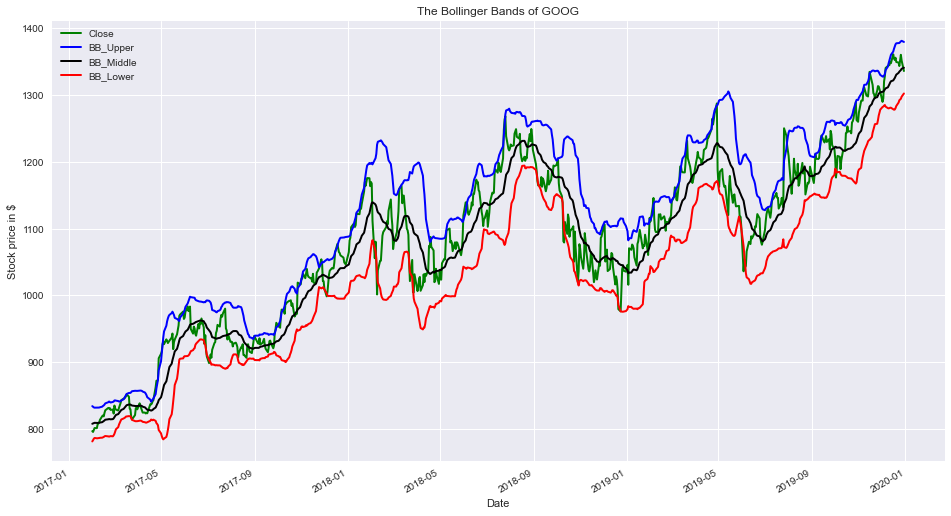

In [50]:
graph_title = 'The Bollinger Bands of ' + stock_symbol
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111, ylabel='Stock price in $', title=graph_title)
model_bbands['Close'].plot(ax=ax1, color='g', lw=2.)
model_bbands['BB_Upper'].plot(ax=ax1, color='b', lw=2.)
model_bbands['BB_Middle'].plot(ax=ax1, color='k', lw=2.)
model_bbands['BB_Lower'].plot(ax=ax1, color='r', lw=2.)
plt.legend()
plt.show()

### 3.f) Relative Strength Indicator (RSI)

In [51]:
model_rsi = stock_yahoo.loc[:, ['Adj Close']]
model_rsi.rename(columns={'Adj Close': 'Close'}, inplace=True)
model_rsi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [52]:
close = model_rsi['Close']

import statistics as stats

rsi_period = 20 # look back period to compute gains & losses
gain_history = [] # history of gains over look back period (0 if no gain, magnitude of gain if gain)
loss_history = [] # history of losses over look back period (0 if no loss, magnitude of loss if loss)
avg_gain_values = [] # track avg gains for visualization purposes
avg_loss_values = [] # track avg losses for visualization purposes
rsi_values = [] # track computed RSI values
last_price = 0 # current_price - last_price > 0 => gain. current_price - last_price < 0 => loss.

for close_price in close:
    if last_price == 0:
        last_price = close_price

    gain_history.append(max(0, close_price - last_price))
    loss_history.append(max(0, last_price - close_price))
    last_price = close_price

    if len(gain_history) > rsi_period: # maximum observations is equal to lookback period
        del (gain_history[0])
        del (loss_history[0])

    avg_gain = stats.mean(gain_history) # average gain over lookback period
    avg_loss = stats.mean(loss_history) # average loss over lookback period

    avg_gain_values.append(avg_gain)
    avg_loss_values.append(avg_loss)

    rs = 0
    if avg_loss > 0: # to avoid division by 0, which is undefined
        rs = avg_gain / avg_loss

    rsi = 100 - (100 / (1 + rs))
    rsi_values.append(rsi)

model_rsi = model_rsi.assign(ClosePrice=pd.Series(close, index=model_rsi.index))
model_rsi = model_rsi.assign(RS_Gain=pd.Series(avg_gain_values, index=model_rsi.index))
model_rsi = model_rsi.assign(RS_Loss=pd.Series(avg_loss_values, index=model_rsi.index))
model_rsi = model_rsi.assign(RSI=pd.Series(rsi_values, index=model_rsi.index))
model_rsi.head()

,Close,ClosePrice,RS_Gain,RS_Loss,RSI
Date,,,,,
2017-01-03,786.140015,786.140015,0.000000,0.0,0.0
2017-01-04,786.900024,786.900024,0.380005,0.0,0.0
2017-01-05,794.020020,794.020020,2.626668,0.0,0.0
2017-01-06,806.150024,806.150024,5.002502,0.0,0.0
2017-01-09,806.650024,806.650024,4.102002,0.0,0.0


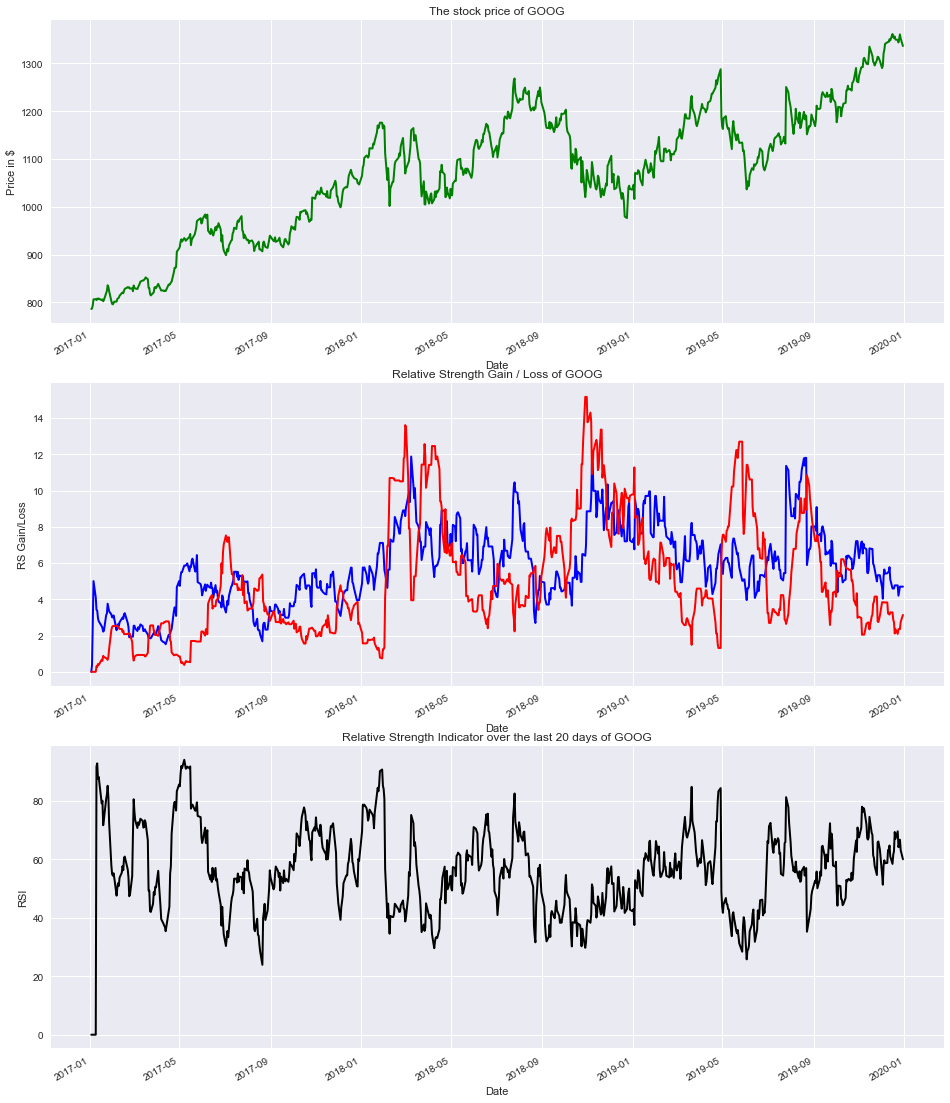

In [53]:
graph_title1 = 'The stock price of ' + stock_symbol
graph_title2 = 'Relative Strength Gain / Loss of ' + stock_symbol
graph_title3 = 'Relative Strength Indicator over the last 20 days of ' + stock_symbol
fig = plt.figure(figsize=(16,21))
ax1 = fig.add_subplot(311, ylabel='Price in $', title=graph_title1)
model_rsi['Close'].plot(ax=ax1, color='g', lw=2.)
ax2 = fig.add_subplot(312, ylabel='RS Gain/Loss', title=graph_title2)
model_rsi['RS_Gain'].plot(ax=ax2, color='b', lw=2.)
model_rsi['RS_Loss'].plot(ax=ax2, color='r', lw=2.)
ax3 = fig.add_subplot(313, ylabel='RSI', title=graph_title3)
model_rsi['RSI'].plot(ax=ax3, color='k', lw=2.)
plt.show()

### 3.g) Standard Deviation (STDEV)

In [54]:
model_stdev = stock_yahoo.loc[:, ['Adj Close']]
model_stdev.rename(columns={'Adj Close': 'Close'}, inplace=True)
model_stdev.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [55]:
stdev_period = 20
model_stdev['StDev'] = model_stdev['Close'].rolling(window=stdev_period).std()
model_stdev.dropna(inplace=True)
model_stdev.head()

,Close,StDev
Date,,
2017-01-31,796.789978,13.209970
2017-02-01,795.695007,12.537045
2017-02-02,798.530029,11.732061
2017-02-03,801.489990,11.343749
2017-02-06,801.340027,11.465222


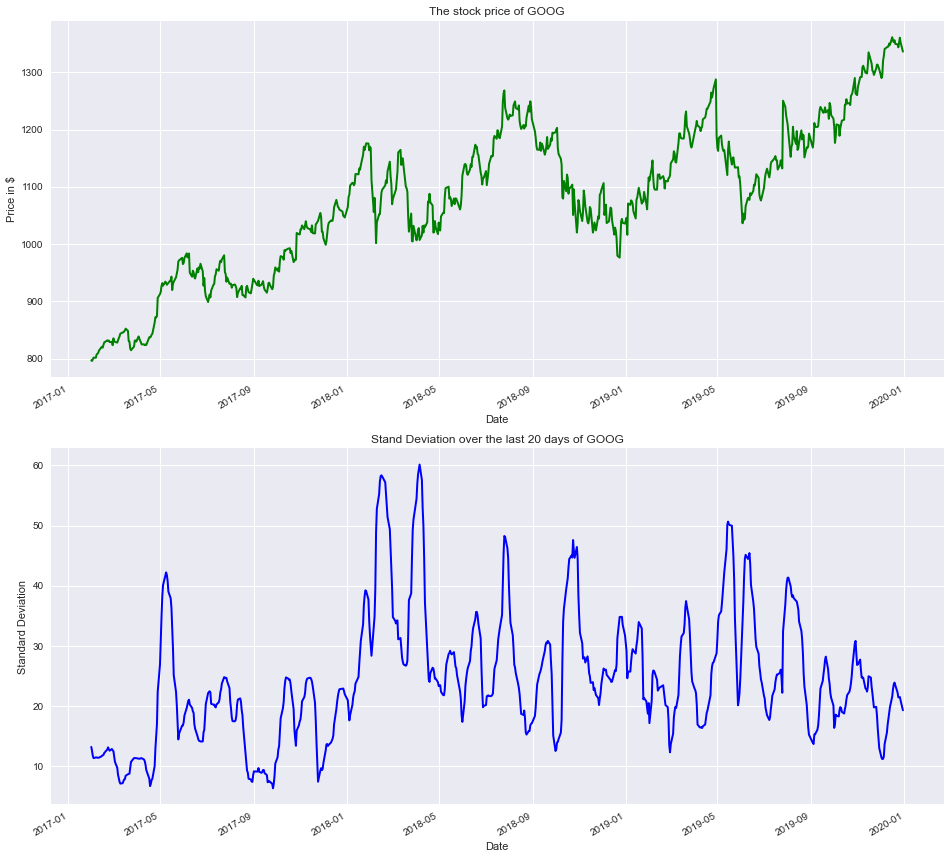

In [56]:
graph_title1 = 'The stock price of ' + stock_symbol
graph_title2 = 'Stand Deviation over the last 20 days of ' + stock_symbol
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(211, ylabel='Price in $', title=graph_title1)
model_stdev['Close'].plot(ax=ax1, color='g', lw=2.)
ax2 = fig.add_subplot(212, ylabel='Standard Deviation', title=graph_title2)
model_stdev['StDev'].plot(ax=ax2, color='b', lw=2.)
plt.show()

### 3.h) Momentum (MOM)

In [57]:
model_mom = stock_yahoo.loc[:, ['Adj Close']]
model_mom.rename(columns={'Adj Close': 'Close'}, inplace=True)
model_mom.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2017-01-03 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [58]:
mom_period = 20
model_mom['past_price'] = model_mom['Close'].shift(periods=mom_period)
model_mom['Mom'] = model_mom['Close'] - model_mom['past_price']
model_mom.dropna(inplace=True)
model_mom.head()

,Close,past_price,Mom
Date,,,
2017-02-01,795.695007,786.140015,9.554993
2017-02-02,798.530029,786.900024,11.630005
2017-02-03,801.489990,794.020020,7.469971
2017-02-06,801.340027,806.150024,-4.809998
2017-02-07,806.969971,806.650024,0.319946


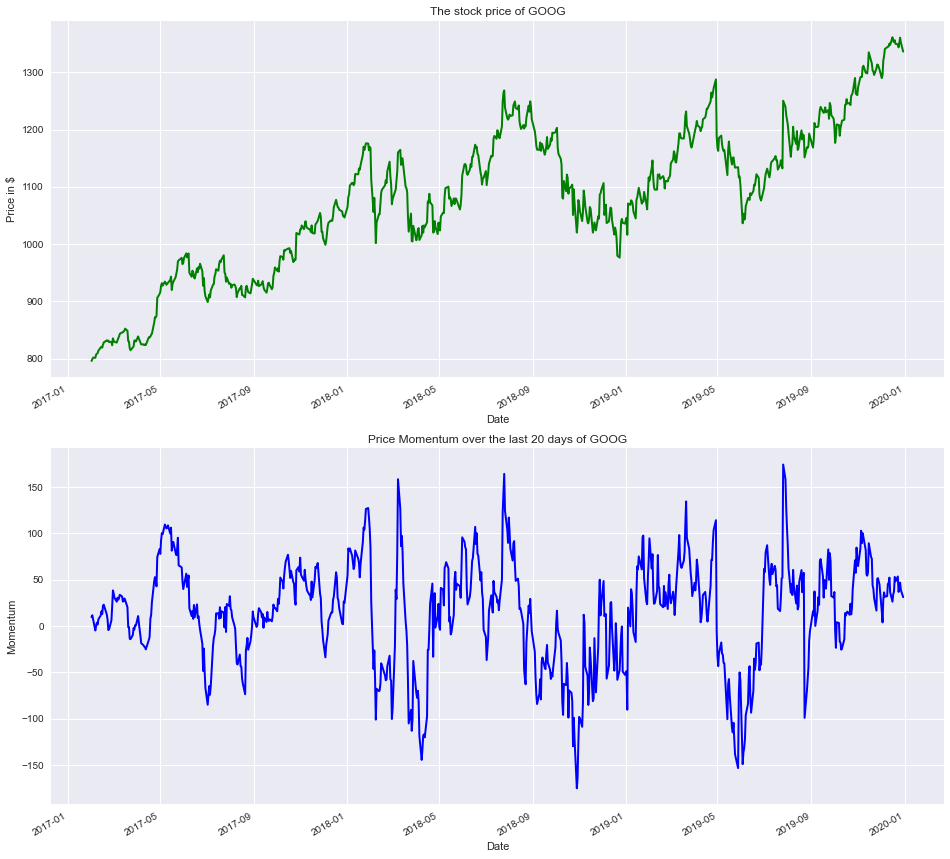

In [59]:
graph_title1 = 'The stock price of ' + stock_symbol
graph_title2 = 'Price Momentum over the last 20 days of ' + stock_symbol
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(211, ylabel='Price in $', title=graph_title1)
model_mom['Close'].plot(ax=ax1, color='g', lw=2.)
ax2 = fig.add_subplot(212, ylabel='Momentum', title=graph_title2)
model_mom['Mom'].plot(ax=ax2, color='b', lw=2.)
plt.show()

In [60]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:11.432186
